## Övning 3.3

Uppgiften lyder
<img src="img/exe3.3.png">
<img src="img/exe3.3b.png">

In [1]:
import pandas as pd
import numpy as np

stickprov = [[1.84, 1.92, 1.94, 1.92, 1.85, 1.91, 2.07], \
             [2.81, 4.06, 3.62, 3.27, 3.27, 3.76, None]]
data = pd.DataFrame(np.transpose(stickprov),columns=["Normal","Rhematoid"])
data

,Normal,Rhematoid
0,1.84,2.81
1,1.92,4.06
2,1.94,3.62
3,1.92,3.27
4,1.85,3.27
5,1.91,3.76
6,2.07,None


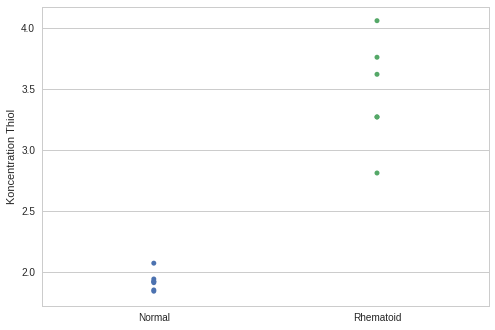

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
sns.stripplot(data=data)
plt.ylabel("Koncentration Thiol")

A. Först undersöker vi om 2.07 är en utliggare enligt Grubbs test

In [3]:
import numpy as np
medel = data.mean()
stdv = data.std()
G = np.abs(2.07-medel["Normal"])/stdv["Normal"]
G

1.9654152596479839

Detta ska jämföras med ett kritiskt värde på 2.02 enligt tabell A.5. Punkten är altså inte en utliggare enligt Grubbs. Vi provar med Dixons test.

In [16]:
points = data["Normal"].sort_values(ascending=False)
Q = np.abs(points.iloc[0]-points.iloc[1]) / \
    (points.max()-points.min())
Q

0.565217391304348

Kritiskt värde är 0.568 enligt tabell A.6. Dvs punkten är inte utliggare enligt Dixons test.

B. Vi gör ett F-test för att se om serierna har signifikant olika varians. Se (3.6.1)

In [18]:
antal = data.count()
var = data.var()
F=var["Rhematoid"]/var["Normal"]
F

33.955250000000049

Kritiskt värde kan utläsas ur tabel A.4 eller ur följande formel.

In [19]:
from scipy.stats import f
f.ppf(1-0.05/2,antal["Rhematoid"]-1,antal["Normal"]-1)

5.9875651260469276

Eftersom vårt värde $F$ är större än det kritiska värdet så kan vi anta att serierna har olika varians och standard avvikelse. Vi skulle även kunnat komma till samma slutsats genom att räkna ut $F$-testets $p$-värde

In [20]:
p=2*f.sf(F,antal["Rhematoid"]-1,antal["Normal"]-1)
p

0.00050209441628037293

### Fortsättning

Vi vet nu att vi kan nu göra ett t-test för prov med olika varians. Vi börjar med att räkna ut ett $t$-värde enligt (3.3.3)

In [27]:
factor = var["Rhematoid"]/antal["Rhematoid"] + var["Normal"]/antal["Normal"]
tv = (medel["Rhematoid"]-medel["Normal"])/ np.sqrt(factor)
tv

8.4772392994897849

Vi kan räkna ut antal frihetsgrader för $t$ m.h.a. (3.3.4)

In [28]:
frihetsgrader = factor**2/ \
     (var["Rhematoid"]**2/((antal["Rhematoid"]-1)*antal["Rhematoid"]**2) + \
      var["Normal"]**2/((antal["Normal"]-1)*antal["Normal"]**2))
frihetsgrader

5.2528298495130041

In [29]:
frihetsgrader = round(frihetsgrader)
frihetsgrader

5.0

Vi kan jämföra vårt $t$-värde med ett kritiskt $t$ på en tvåsidig 5%-nivå (= ensidig 2.5%-nivå) med 5 frihetsgrader, $t^{0.975}_{5}$. Samma värde kan även hittas i tabell A.2.

In [30]:
from scipy.stats import t
t.ppf(1-0.05/2,frihetsgrader)

2.5705818366147395

Genomsnitten skiljer sig signifikant åt, eftersom abs(tv) > $t^{0.975}_{5}$.

Vi kan även räkna ut ett $p$-värde. Observera multiplikation med 2 för att få ett två-sidigt $p$-värde.

In [31]:
p=2*t.sf(abs(tv),frihetsgrader)
p

0.00037529078864025067